In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


C:\Users\Eschwarzova\AppData\Local\Temp\ipykernel_9880\1582560343.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Modeling part

In [14]:
df = pd.read_csv('data\cleaned_data_v2.csv')

In [15]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Admission grade,Displaced,Debtor,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,127.3,1,0,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,142.5,1,0,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,124.8,1,0,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,119.6,1,0,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,141.5,0,0,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


In [16]:
columns_to_encode = ['Marital status', 'Course', 'Previous qualification']

# Assuming 'Column1', 'Column2', etc. are the columns you want to one-hot encode
df_encoded = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)

# Display the first few rows of the modified DataFrame
df_encoded.head()

,Application mode,Application order,Daytime/evening attendance\t,Previous qualification (grade),Admission grade,Displaced,Debtor,Tuition fees up to date,Gender,Scholarship holder,...,Previous qualification_10,Previous qualification_12,Previous qualification_14,Previous qualification_15,Previous qualification_19,Previous qualification_38,Previous qualification_39,Previous qualification_40,Previous qualification_42,Previous qualification_43
0,17,5,1,122.0,127.3,1,0,1,1,0,...,False,False,False,False,False,False,False,False,False,False
1,15,1,1,160.0,142.5,1,0,0,1,0,...,False,False,False,False,False,False,False,False,False,False
2,1,5,1,122.0,124.8,1,0,0,1,0,...,False,False,False,False,False,False,False,False,False,False
3,17,2,1,122.0,119.6,1,0,1,0,0,...,False,False,False,False,False,False,False,False,False,False
4,39,1,0,100.0,141.5,0,0,1,0,0,...,False,False,False,False,False,False,False,False,False,False


First, we need to do train test split and then on train deal with classes inbalances as some methods require balanced dataset. We can use undersampling or oversampling. My decission is toward the latter. SMOTE.

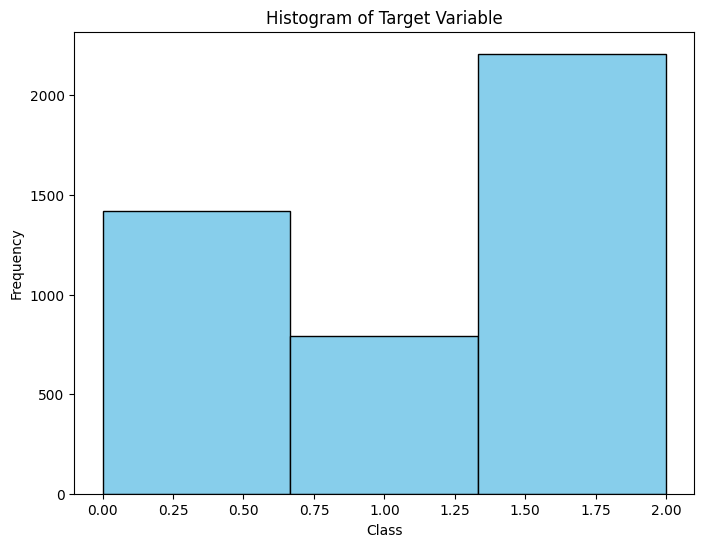

In [8]:
plt.figure(figsize=(8, 6))
plt.hist(df["Target"], bins=len(df["Target"].unique()), color='skyblue', edgecolor='black')
plt.title('Histogram of Target Variable')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [17]:
X = df_encoded.drop('Target', axis=1)
y = df_encoded['Target']

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the class distribution in the training data before SMOTE
y_train.value_counts()



Target
2    1767
0    1137
1     635
Name: count, dtype: int64

In [18]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# You can now check the class distribution to confirm balancing
y_train_smote.value_counts()

Target
2    1767
0    1767
1    1767
Name: count, dtype: int64

In [19]:
# Define models and parameters for grid search
models = {
    'LogisticRegression': (
        LogisticRegression(),
        {
            'C': [0.1, 1, 10],
            'solver': ['liblinear', 'saga'],  # Add solver options
            'penalty': ['l1', 'l2']  # Add penalty options
        }
    ),
    'DecisionTree': (
        DecisionTreeClassifier(),
        {
            'max_depth': [3, 5, 10, None],  # Explore unrestricted depth
            'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
            'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
        }
    ),
    'RandomForest': (
        RandomForestClassifier(),
        {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 3, 5, 10],  # Include option for unlimited depth
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
        }
    ),
    'KNN': (
        KNeighborsClassifier(),
        {
            'n_neighbors': [3, 5, 7, 10],  # Number of neighbors to use
            'weights': ['uniform', 'distance'],  # Weight function used in prediction
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  # Algorithm used to compute the nearest neighbors
        }
    ),
    'XGBoost': (
        XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        {
            'max_depth': [3, 5, 7, 9],  # Maximum tree depth for base learners
            'n_estimators': [100, 200, 300],  # Number of gradient boosted trees
            'learning_rate': [0.01, 0.1, 0.2],  # Boosting learning rate
            'subsample': [0.7, 0.8, 1.0],  # Subsample ratio of the training instances
            'colsample_bytree': [0.7, 0.8, 1.0]  # Subsample ratio of columns when constructing each tree
        }
    )
}

In [20]:
# Standardize features only for KNN
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)  # Apply scaling to test set for KNN

for name, (model, params) in models.items():
    if name == 'KNN':
        # Scale the training set for KNN
        X_train_smote_scaled = scaler.fit_transform(X_train_smote)
        clf = GridSearchCV(model, params, cv=5, scoring='accuracy')
        clf.fit(X_train_smote_scaled, y_train_smote)
        predictions = clf.predict(X_test_scaled)  # Use scaled test set for prediction with KNN
    else:
        clf = GridSearchCV(model, params, cv=5, scoring='accuracy')
        clf.fit(X_train_smote, y_train_smote)
        predictions = clf.predict(X_test)  # Use original test set for prediction with other models

    print(f"{name} - Best Parameters: {clf.best_params_}")
    print(f"Accuracy: {accuracy_score(y_test, predictions):.4f}")
    print(f"Precision: {precision_score(y_test, predictions, average='macro'):.4f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, predictions)}\n")

LogisticRegression - Best Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.7537
Precision: 0.6926
Confusion Matrix:
[[202  46  36]
 [ 39  67  53]
 [ 14  30 398]]

DecisionTree - Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.6554
Precision: 0.6068
Confusion Matrix:
[[184  71  29]
 [ 46  66  47]
 [ 31  81 330]]

RandomForest - Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.7627
Precision: 0.7098
Confusion Matrix:
[[207  41  36]
 [ 34  75  50]
 [  8  41 393]]

KNN - Best Parameters: {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}
Accuracy: 0.6565
Precision: 0.6013
Confusion Matrix:
[[167  64  53]
 [ 36  65  58]
 [ 39  54 349]]

XGBoost - Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 9, 'n_estimators': 300, 'subsample': 0.8}
Accuracy: 0.7492
Precision: 0.6907
Confusion Matrix:
[[208  

Best estimator:

RandomForest - Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.7627
Precision: 0.7098
Confusion Matrix:
[[207  41  36]
 [ 34  75  50]
 [  8  41 393]]